In [1]:
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

from src.reader import read_lusa, read_timebank

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']


ROOT = Path().resolve().parent.parent

In [2]:
results_path = ROOT / "results" / "prompt_selection"

In [3]:
df_pt = pd.read_csv(results_path / "portuguese"/ "results.csv")
df_pt["language"] = "Portuguese"

df_en = pd.read_csv(results_path / "english"/ "results.csv")
df_en["language"] = "English"

df = pd.concat([df_pt, df_en])
df.reset_index(inplace=True, drop=True)
df

,model,template,entity,precision,recall,f1,f1_r,language
0,chatgpt,ext,event triggers,0.456522,0.260331,0.331579,0.605356,Portuguese
1,chatgpt,cls,event triggers,0.433511,0.336777,0.379070,0.617449,Portuguese
2,chatgpt,cls_def,event triggers,0.601266,0.392562,0.475000,0.784746,Portuguese
3,chatgpt,ext_def,event triggers,0.612903,0.392562,0.478589,0.782263,Portuguese
4,chatgpt,ext_exp,event triggers,0.490265,0.572314,0.528122,0.638241,Portuguese
...,...,...,...,...,...,...,...,...
355,llama2-7b-chat,cls_def_exp,time expressions,0.065421,0.113821,0.083086,0.138516,English
356,llama2-7b-chat,cls_exp,time expressions,0.067961,0.113821,0.085106,0.118924,English
357,llama2-7b-chat,ext_def_exp,time expressions,0.066390,0.130081,0.087912,0.109416,English
358,llama2-7b-chat,ext_exp,time expressions,0.077206,0.170732,0.106329,0.132826,English


In [4]:
models = df.model.unique().tolist()
languages = df.language.unique().tolist()
entities = df.entity.unique().tolist()
templates = ["ext", "cls",	"ext_def", "ext_exp", "cls_def", "ext_def_exp",  "cls_exp", "cls_def_exp"]
labels = ["_ _ _", "C _ _", "_ D _", "_ _ E", "C D _", "_ D E",  "C _ E", "C D E"]


In [5]:
data = {}
for lang in languages:
    for entity in entities:
        for tid in templates:
            values = df[(df.template == tid) & (df.language == lang) & (df.entity == entity)]["f1"].tolist()
            data[(lang, entity, tid)] = values

/home/hugosousa/Projects/gpt_struct_me/.venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/hugosousa/Projects/gpt_struct_me/.venv/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following familie

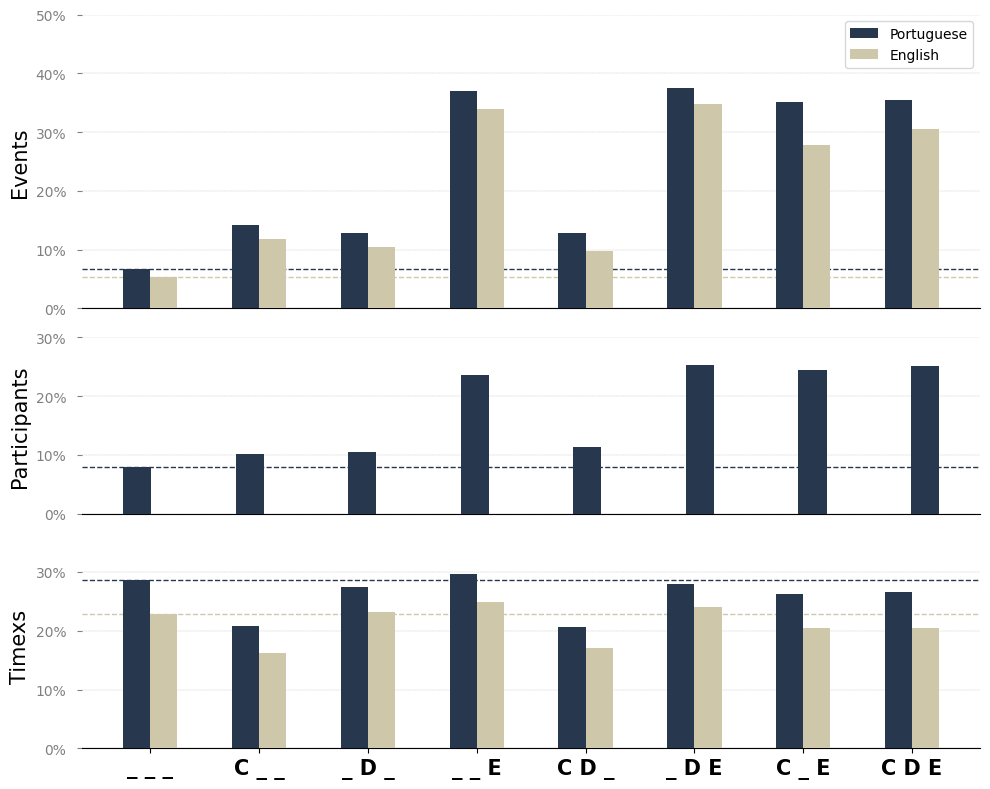

In [6]:
colors = ['#27374D', '#cfc7a9'] 

x = np.arange(len(templates))
width = 0.25


fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(10, 8),
                                    height_ratios=[50, 30, 35], layout='tight')

multiplier = 0
for language, color in zip(languages, colors):
    offset = width * multiplier
    values = [np.mean(data[(language, "event triggers", tid)])* 100 for tid in templates]
    rects = ax0.bar(x + offset, values, width, label=language, color=color, zorder=10)
    ax0.axhline(y=np.mean(data[(language, "event triggers", "ext")]) * 100, color=color, linestyle='--', linewidth=1, zorder=5)
    multiplier += 1
ax0.set_xticks([])
ax0.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
ax0.tick_params(axis='y', colors='grey')
ax0.set_ylabel("Events", size=15)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['bottom'].set_visible(True)
ax0.spines['left'].set_visible(False)
ax0.set_ylim([0, 50])
ax0.legend(loc='upper right')
ax0.grid(axis='y', ls="--", lw = 0.25)
ax0.tick_params(axis='y', which='major', pad=8)


multiplier = 0
for language, color in zip(languages, colors):
    offset = width * multiplier
    values = [np.mean(data.get((language, "participants", tid), 0)) * 100 for tid in templates]
    rects = ax1.bar(x + offset, values, width, label=language, color=color, zorder=10)
    ax1.axhline(y=np.mean(data[(language, "participants", "ext")]) * 100, color=color, linestyle='--', linewidth=1, zorder=5)
    multiplier += 1
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
ax1.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax1.set_xticks([])
ax1.set_yticks([0, 10, 20, 30])
ax1.tick_params(axis='y', colors='grey')
ax1.set_ylabel("Participants", size=15, )
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(False)
ax1.set_ylim([0, 30])
ax1.grid(axis='y', ls="--", lw = 0.25)
ax1.tick_params(axis='y', which='major', pad=8)

multiplier = 0
for language, color in zip(languages, colors):
    offset = width * multiplier
    values = [np.mean(data[(language, "time expressions", tid)]) * 100 for tid in templates]
    rects = ax2.bar(x + offset, values, width, label=language, color=color, zorder=10)
    ax2.axhline(y=np.mean(data[(language, "time expressions", "ext")]) * 100, color=color, linestyle='--', linewidth=1, zorder=5)
    multiplier += 1
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
ax2.axhline(y=0, color='black', ls='-', lw=0.5)
ax2.set_xticks(x + width / 2, labels, size=15, weight='bold')
ax2.set_yticks([0, 10, 20, 30])
ax2.tick_params(axis='y', colors='grey')
ax2.set_ylabel("Timexs", size=15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(True)
ax2.spines['left'].set_visible(False)
ax2.set_ylim([0, 35])
ax2.grid(axis='y', ls="--", lw = 0.25)
ax2.tick_params(axis='y', which='major', pad=8)

plt.savefig('prompt_components_mean_f1.jpg', format='jpg', dpi=1200)
plt.show()